# Week 2 : Tidy Data, Handling DateTime and Forecasting

In [80]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Data Description

This tutorial uses air quality data Nitrogen Dioxide (NO2) and Particulate matter less than 2.5 micrometers, made available by openaq and using the py-openaq package. The air_quality_long.csv data set provides  and  values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

The air-quality data set has the following columns:

city: city where the sensor is used, either Paris, Antwerp or London

country: country where the sensor is used, either FR, BE or GB

location: the id of the sensor, either FR04014, BETR801 or London Westminster

parameter: the parameter measured by the sensor, either  or Particulate matter

value: the measured value

unit: the unit of the measured parameter, in this case ‘µg/m³’

and the index of the DataFrame is datetime, the datetime of the measurement.

For more data visit: [EPA.gov](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information)

#### Task 1: Import necessary libraries

In [81]:
import pandas as pd

#### Task 2: Import Data and quick checks

In [82]:
airq = pd.read_csv ('air_quality_long.csv')
airq.dtypes

city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [83]:
airq.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [84]:
airq["city"].value_counts(normalize=True)
airq["country"].value_counts()
airq["location"].value_counts()
airq["parameter"].value_counts()
airq["unit"].value_counts()

London       0.617602
Paris        0.317906
Antwerpen    0.064492
Name: city, dtype: float64

GB    3256
FR    1676
BE     340
Name: country, dtype: int64

London Westminster    3256
FR04014               1676
BETR801                340
Name: location, dtype: int64

no2     3447
pm25    1825
Name: parameter, dtype: int64

µg/m³    5272
Name: unit, dtype: int64

In [85]:
airq[["country", "city", "location"]].value_counts()

country  city       location          
GB       London     London Westminster    3256
FR       Paris      FR04014               1676
BE       Antwerpen  BETR801                340
dtype: int64

## Pivot and Melt

####  Task 3: Create a dataset with each row has a unique date and each column is a parameter value for a particular location (long --> wide)

#### Task 4: Get the dataset created in task 1 in the long format.

In [86]:
no2 = airq[airq["parameter"]== "no2"]
no2_pivot = no2.pivot (index = "date.utc", columns= "location", values= "value")

In [87]:
no2_pivot.head()

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,54.5,34.2,67.0
2019-04-09 04:00:00+00:00,34.5,48.5,41.0
2019-04-09 05:00:00+00:00,46.5,59.5,41.0


<AxesSubplot:xlabel='date.utc'>

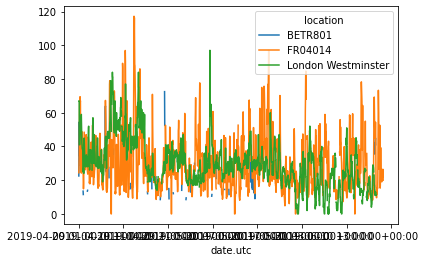

In [88]:
no2_pivot.plot()

In [89]:
no2_pivot.dtypes

location
BETR801               float64
FR04014               float64
London Westminster    float64
dtype: object

In [90]:
no2_pivot = no2_pivot.reset_index()
no2_long = no2_pivot.melt (id_vars= "date.utc")
no2_long.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


In [91]:
no2_pivot.dtypes

location
date.utc               object
BETR801               float64
FR04014               float64
London Westminster    float64
dtype: object

## Tidy Data 
####  Task 5: Create a dataset with only BE values and get it in tidy format to analyze relationship between no2 and pm25

In [92]:
BE_data= airq[airq["country"]=="BE"]
BE_data.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


Pulling information specific only to Belgium (BE)

In [93]:
BE_datap= BE_data.pivot(index = "date.utc", columns = "parameter", values= "value")
BE_datap.head()

parameter,no2,pm25
date.utc,,
2019-04-09 01:00:00+00:00,22.5,76.0
2019-04-09 02:00:00+00:00,53.5,91.5
2019-04-09 03:00:00+00:00,54.5,99.0
2019-04-09 04:00:00+00:00,34.5,83.5
2019-04-09 05:00:00+00:00,46.5,68.0


Organizing data starting by date and the parameters (N02 and PM25)

In [94]:
BE_datap.reset_index(inplace = True)
BE_datap.head()

parameter,date.utc,no2,pm25
0,2019-04-09 01:00:00+00:00,22.5,76.0
1,2019-04-09 02:00:00+00:00,53.5,91.5
2,2019-04-09 03:00:00+00:00,54.5,99.0
3,2019-04-09 04:00:00+00:00,34.5,83.5
4,2019-04-09 05:00:00+00:00,46.5,68.0


inplace = true modifies and commits the changes to the dataframe as a result of a function. In this case, we are adding another column, parameter, that represent the indeces of each respective date starting from 0 and onwards

## Handling Datetime

#### Task 6: Create two new columns, month and day of the week

#### Task 7: Convert the hourly data into a daily data

In [95]:
BE_datap ["datetime"]= pd.to_datetime(BE_datap["date.utc"])
BE_datap.head()

parameter,date.utc,no2,pm25,datetime
0,2019-04-09 01:00:00+00:00,22.5,76.0,2019-04-09 01:00:00+00:00
1,2019-04-09 02:00:00+00:00,53.5,91.5,2019-04-09 02:00:00+00:00
2,2019-04-09 03:00:00+00:00,54.5,99.0,2019-04-09 03:00:00+00:00
3,2019-04-09 04:00:00+00:00,34.5,83.5,2019-04-09 04:00:00+00:00
4,2019-04-09 05:00:00+00:00,46.5,68.0,2019-04-09 05:00:00+00:00


pd.to_datetime converts the argument to datetime. Meaning date.utc will be named in a different column as datetime 

In [96]:
BE_datap.dtypes

parameter
date.utc                 object
no2                     float64
pm25                    float64
datetime    datetime64[ns, UTC]
dtype: object

In [97]:
BE_datap["datetime"].min()

Timestamp('2019-04-09 01:00:00+0000', tz='UTC')

In [98]:
BE_datap["datetime"].max()

Timestamp('2019-06-18 06:00:00+0000', tz='UTC')

In [99]:
BE_datap["datetime"].max()-BE_datap["datetime"].min()

Timedelta('70 days 05:00:00')

This shows the differences in days between the last and first date of recorded data for the selected dataset

In [100]:
BE_datap ["month"] = BE_datap["datetime"].dt.month 
BE_datap.month.unique()

array([4, 5, 6], dtype=int64)

We are trying to record in which months the data was collected in

In [101]:
BE_datap["day"] = BE_datap["datetime"].dt.dayofweek
BE_datap.day.unique()

array([1, 2, 3, 4, 0, 5, 6], dtype=int64)

Same as above but for days 

In [102]:
BE_datap.set_index('datetime', drop = True, inplace= True)
BE_datap.head()

parameter,date.utc,no2,pm25,month,day
datetime,,,,,
2019-04-09 01:00:00+00:00,2019-04-09 01:00:00+00:00,22.5,76.0,4,1
2019-04-09 02:00:00+00:00,2019-04-09 02:00:00+00:00,53.5,91.5,4,1
2019-04-09 03:00:00+00:00,2019-04-09 03:00:00+00:00,54.5,99.0,4,1
2019-04-09 04:00:00+00:00,2019-04-09 04:00:00+00:00,34.5,83.5,4,1
2019-04-09 05:00:00+00:00,2019-04-09 05:00:00+00:00,46.5,68.0,4,1


We created two additional columms that represent the month and the day the data was recorded; 4/19/2019 will be considered the 1st day. 

In [103]:
dailydata = BE_datap.resample ('D').mean()
dailydata.head()

parameter,no2,pm25,month,day
datetime,,,,
2019-04-09 00:00:00+00:00,37.961538,59.461538,4.0,1.0
2019-04-10 00:00:00+00:00,12.500000,25.250000,4.0,2.0
2019-04-11 00:00:00+00:00,13.750000,9.500000,4.0,3.0
2019-04-12 00:00:00+00:00,23.750000,22.000000,4.0,4.0
2019-04-13 00:00:00+00:00,NaN,NaN,NaN,NaN


## Regression

#### Task 8: Plot a scatterplot to visually evaluate the relationship between no2 and pm25

#### Task 9: Fit a linear regression

<AxesSubplot:xlabel='no2', ylabel='pm25'>

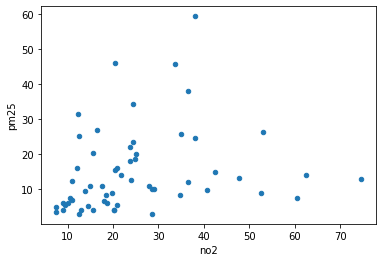

In [104]:
dailydata.plot.scatter (x="no2", y="pm25")

The scatterplot shows there is no relationship between the two variables (pm25 and no2). Further analysis must be done to determine the extent of the relationship if there is one; for example, p-value in a t-test

In [105]:
dailydata.isnull().sum()

parameter
no2      13
pm25      3
month     3
day       3
dtype: int64

The following are the total of missing values from the selected array

In [106]:
BE_datap.shape

(180, 5)

In [107]:
dailydata.shape

(71, 4)

In [108]:
cleaneddata= dailydata.dropna()
rowsdropped = dailydata.shape [0] - cleaneddata.shape [0]
print ("number of rows dropped that had missing values: " + str (rowsdropped))

number of rows dropped that had missing values: 13


In [109]:
import statsmodels.api as sm
Y = cleaneddata["pm25"]
X = cleaneddata["no2"]
X = sm.add_constant(X)

regmodel = sm.OLS(Y,X)


C:\Users\nickh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
regmodel.fit ().summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.087
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0844
Time:                        19:07:58   Log-Likelihood:                -223.92
No. Observations:                  58   AIC:                             451.8
Df Residuals:                      56   BIC:                             456.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3841      3.021      3.437      0.001       4.331      16.437
no2            0.1833      0.104      1.757      0.084      -0.026       0.392
==============================================================================
Omnibus:                       26.523   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.193
Skew:                           1.641   Prob(JB):                     6.88e-10
Kurtosis:                       5.585   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value for NO2 is greater than the standard alpha value of 0.05, we can conclude there's not a statistically significant relationship between pm25 and no2.

In [111]:
regmodel.fit ().params

const    10.384135
no2       0.183290
dtype: float64

The following is the regression equation : Y(pm25)= 10.3841 + 0.1833*(no2)

## Forecast

#### Task 10: Fit a exponential smoothing (Holt Winters) Model

In [112]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [113]:
cleaneddata.head()

parameter,no2,pm25,month,day
datetime,,,,
2019-04-09 00:00:00+00:00,37.961538,59.461538,4.0,1.0
2019-04-10 00:00:00+00:00,12.500000,25.250000,4.0,2.0
2019-04-11 00:00:00+00:00,13.750000,9.500000,4.0,3.0
2019-04-12 00:00:00+00:00,23.750000,22.000000,4.0,4.0
2019-04-15 00:00:00+00:00,38.166667,24.700000,4.0,0.0


Making sure the data I'm using is the correct one 

In [114]:
add_model= ExponentialSmoothing(cleaneddata['pm25'], trend ='additive', seasonal = 'additive', seasonal_periods = 7)
add_results = add_model.fit()
add_fit = add_results.predict (0, len(cleaneddata))

C:\Users\nickh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nickh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\nickh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [115]:
mul_model= ExponentialSmoothing(cleaneddata['pm25'], trend ='multiplicative', seasonal = 'multiplicative', seasonal_periods = 7)
mul_results = mul_model.fit()
mul_fit = mul_results.predict (0, len(cleaneddata))

C:\Users\nickh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nickh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\nickh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [116]:
import matplotlib.pyplot as plt

In [118]:
pm_sample = cleaneddata.iloc[:,1]
print (pm_sample)

datetime
2019-04-09 00:00:00+00:00    59.461538
2019-04-10 00:00:00+00:00    25.250000
2019-04-11 00:00:00+00:00     9.500000
2019-04-12 00:00:00+00:00    22.000000
2019-04-15 00:00:00+00:00    24.700000
2019-04-16 00:00:00+00:00    23.500000
2019-04-17 00:00:00+00:00     8.500000
2019-04-18 00:00:00+00:00    25.750000
2019-04-19 00:00:00+00:00    20.000000
2019-04-21 00:00:00+00:00    27.000000
2019-04-22 00:00:00+00:00    34.500000
2019-04-25 00:00:00+00:00     3.000000
2019-04-26 00:00:00+00:00     4.250000
2019-04-27 00:00:00+00:00     6.750000
2019-04-28 00:00:00+00:00     5.500000
2019-04-29 00:00:00+00:00    14.250000
2019-04-30 00:00:00+00:00    16.000000
2019-05-01 00:00:00+00:00    31.500000
2019-05-02 00:00:00+00:00    45.750000
2019-05-03 00:00:00+00:00     9.000000
2019-05-04 00:00:00+00:00     4.250000
2019-05-05 00:00:00+00:00     4.000000
2019-05-06 00:00:00+00:00    10.250000
2019-05-07 00:00:00+00:00    13.250000
2019-05-08 00:00:00+00:00    14.250000
2019-05-09 00:00

I encountered problems in the next line of code so I made a new variable (pm_sample) to select and store all the data values found in the pm25 column. I did this because I kept on encountering an error that prevented the graph from creating the black solid line to compare against the other dashed lines. My initial thought was that the cleaneddata variable was not properly storing the values, therefore not producing the line. In addition, another error popped up (Error DateFormatter found a value of x=0, which is an illegal date in matplotlib bar plot). I got around this error by creating the pm_sample variable, which listed all the datetime and pm25 values in order 

<Figure size 864x576 with 0 Axes>

([<matplotlib.axis.XTick at 0x25b31954ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

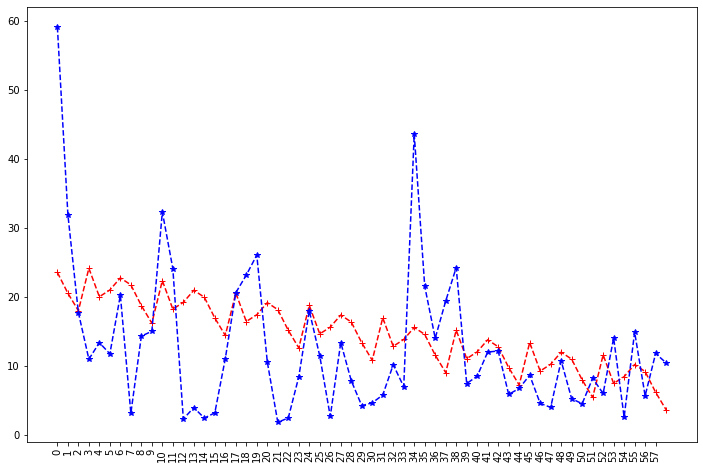

In [121]:
plt.figure (figsize = (12,8))
tickvalues = range (0, len(cleaneddata.index))
plt.xticks (ticks = tickvalues, rotation ='vertical')
plt.plot(pm_sample[1], linestyle = 'solid', color ='black', label = 'Actual')
plt.plot(add_fit, linestyle = 'dashed', color= 'red', marker='+', label = 'Additive Model')
plt.plot(mul_fit, linestyle = 'dashed', color= 'blue', marker= '*', label = 'Multiplicative Model') 


THere is a decreasing trend for the additive model. The multiplicative model does not show any trend. Therefore the additive model would be more useful to use. 
 

Note: I tried my best in finding a way to display the raw data (black solid line) but my very limited knowledge of python failed me to reach a solution.

More information available on [to_datetime](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-components)
[What is the point of indexing in pandas](https://stackoverflow.com/questions/27238066/what-is-the-point-of-indexing-in-pandas)

Reference: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-reshaping